## Introduction

An artificial neural network (ANN) is the piece of a computing system designed to simulate the way the human brain analyzes and processes information.

### Structure of the neurons

The general structure of a generic neuron is shown in the following figure:

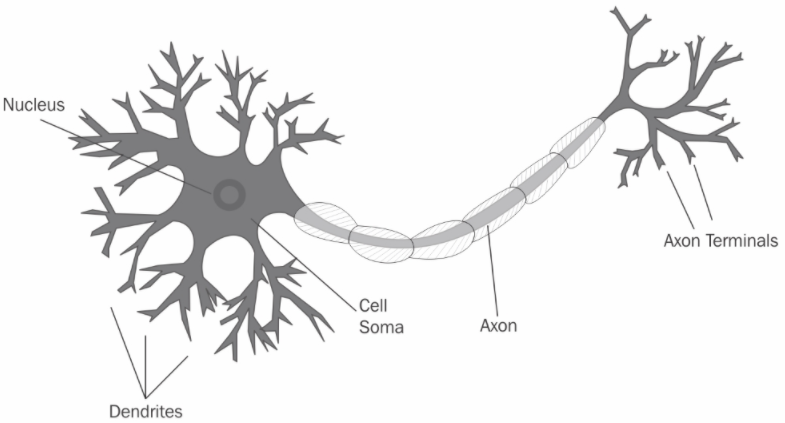

Neurons receive signals and produce a response. The branches to the left are the transmission channels for incoming information and are called dendrites. Dendrites receive the signals at the contact region with other cells, the so-called synapses. The output signals are transmitted by the axon, of which each cell has at most one. Some cells do not have an axon, because their task is only to set some cells in contact with others (in the retina, for example).

## Artificial neural network

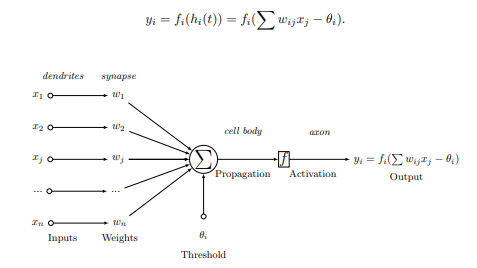

* **Set of inputs**: $x_j(t)$

* **Pattern of connectivity**: The strength of the connection between any two units will determine the extent to which the activation state of one unit can affect the activation state of another unit at a subsequent time point. It can be represented by $w_{ij}$.

* **Propagation rule**: This rule takes the vector x(t) for the processing units sending activation and combines it with the connectivity $w_{ij}$ to produce a summed or net input into each receiving unit: $h_{i}(t) = \sum_{j}w_{ij}x_{j}$.

* **Activation rule**: to specify how the net inputs to a given unit are combined to produce its new activation state: $y_i = f_i(h_i(t))$.

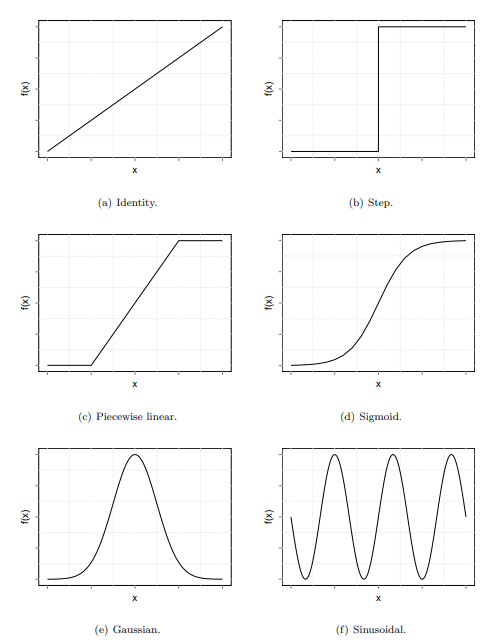

Frequently, an additional parameter $\theta_i$ is added: this parameter is the so-called threshold.

## Neural Network

**Multi-Layer Perceptrons (MLPs)** are one of the most popular artificial neural net structures in Machine Learning. For Deep Learning, there are other important structures such as CNN, LSTM.

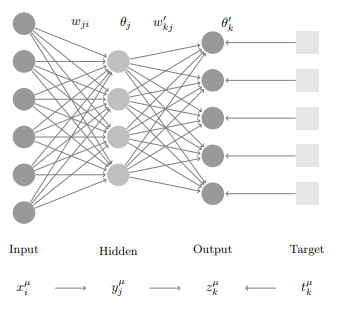

* $x_i$: input pattern
* $y_i$: responses of the hidden layer
* $z_k$: reponses of the output layer
* $t^\mu_k$: target pattern
* $\mu$: number of patterns
* $w_{ji}$: weights of the hidden layer
* $w'_{kj}$: weights of the output layer
* $\theta_j$: thresholds of the hidden layer
* $\theta'_j$: thresholds of the output layer

MLP operation is described by:

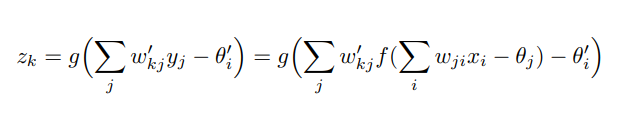

where $f$ and $g$ are a sigmoid activation function:



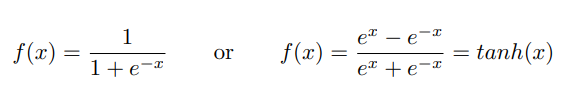

The importance of this architecture is that Multilayer perceptron with as few as hidden layers using sigmoid functions is capable of approximating any measurable function from one finite dimensional space to another to any desired degree of accuracy, provided sufficiently many hidden units are available. In this sense, MLP are a **class of universal approximators**.

### Example using different number of hidden neurons

We create an spiral with two clusters:

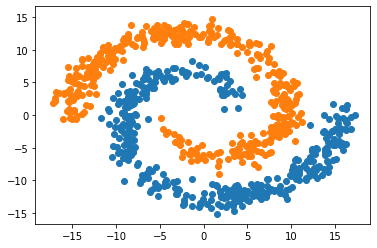

In [41]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

We prepare dataset for the Neural Network:

In [42]:
import pandas as pd
data_a = pd.DataFrame([x_a[:,0], x_a[:,1]]).T
data_a.columns = ["x", "y"]
data_a["class"] = "A"
data_a

,x,y,class
0,-3.483977,-10.223730,A
1,11.780754,-7.009313,A
2,12.972437,-7.888415,A
3,1.570146,-15.139315,A
4,-0.248250,6.327644,A
...,...,...,...
395,4.088919,-12.777490,A
396,2.435607,6.185085,A
397,-8.774987,-6.677296,A
398,4.440611,-11.937351,A


In [43]:
import pandas as pd
data_b = pd.DataFrame([x_b[:,0], x_b[:,1]]).T
data_b.columns = ["x", "y"]
data_b["class"] = "B"
data_b

,x,y,class
0,1.680817,13.316942,B
1,-12.810061,6.580988,B
2,-12.666000,5.393456,B
3,-1.615726,12.034345,B
4,-2.681071,-4.653724,B
...,...,...,...
395,-3.838938,12.751460,B
396,-1.685884,-5.943567,B
397,8.014024,7.791094,B
398,-4.973548,13.103135,B


In [44]:
data = pd.concat([data_a, data_b])
data

,x,y,class
0,-3.483977,-10.223730,A
1,11.780754,-7.009313,A
2,12.972437,-7.888415,A
3,1.570146,-15.139315,A
4,-0.248250,6.327644,A
...,...,...,...
395,-3.838938,12.751460,B
396,-1.685884,-5.943567,B
397,8.014024,7.791094,B
398,-4.973548,13.103135,B


We create some MLP models with different number of neurons in the hidden layer:

Model... (1/8)
Model... (2/8)


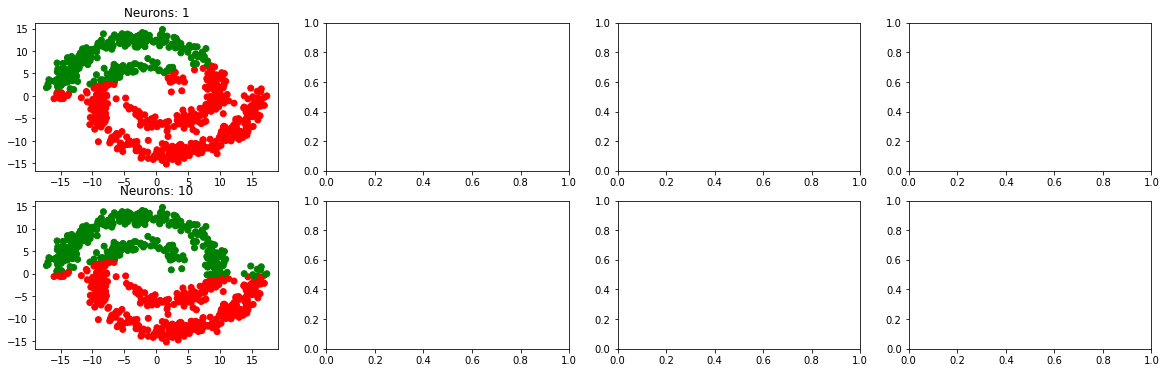

In [45]:
import warnings
warnings.filterwarnings('ignore')
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [1, 10, 20, 50, 100, 200, 400, 800]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]], data["class"])
        predict_values = model.predict(data[["x","y"]])
        colors = {"A":"red", "B":"green"}
        axs[i,j].scatter(data["x"],data["y"], c=np.vectorize(colors.get)(predict_values))
        axs[i,j].set_title("Neurons: " + str(neurons[index-1]))
        index +=1
        break

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

In [46]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y, ax):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    Z[Z=="A"] = 1
    Z[Z=="B"] = 0
    ax.contourf(xx, yy, Z, c=y, cmap=plt.cm.Spectral)
    colors = {"A":"#F1948A", "B":"#52BE80"}
    cols_dots = np.vectorize(colors.get)(model(X))
    ax.scatter(X[:, 0], X[:, 1], c=cols_dots, cmap=plt.cm.Spectral)
    ax.set_title("Neurons: " + str(neurons[index-1]))

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


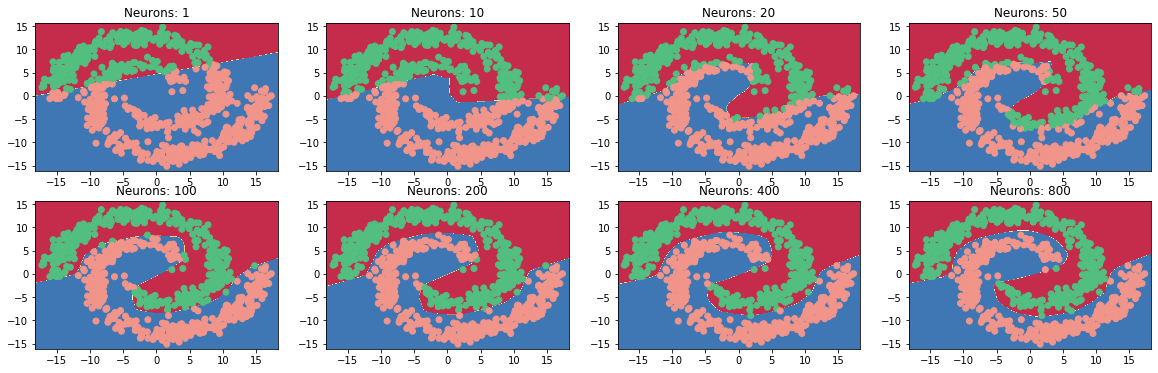

In [47]:
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [1, 10, 20, 50, 100, 200, 400, 800]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]].values, data["class"].values)
        plot_decision_boundary(lambda x: model.predict(x), data[["x","y"]].values, data["class"].values, axs[i,j])
        index +=1

We create some MLP models with different architecture

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


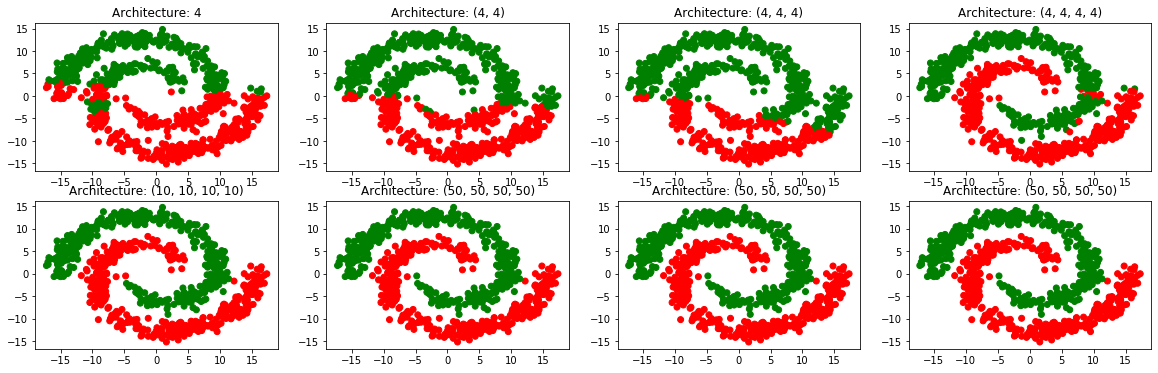

In [48]:
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [(4), (4,4), (4,4,4), (4,4,4,4), (10,10,10,10), (50,50,50,50), (50,50,50,50), (50,50,50,50)]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]], data["class"])
        predict_values = model.predict(data[["x","y"]])
        colors = {"A":"red", "B":"green"}
        axs[i,j].scatter(data["x"],data["y"], c=np.vectorize(colors.get)(predict_values))
        axs[i,j].set_title("Architecture: " + str(neurons[index-1]))
        index +=1

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


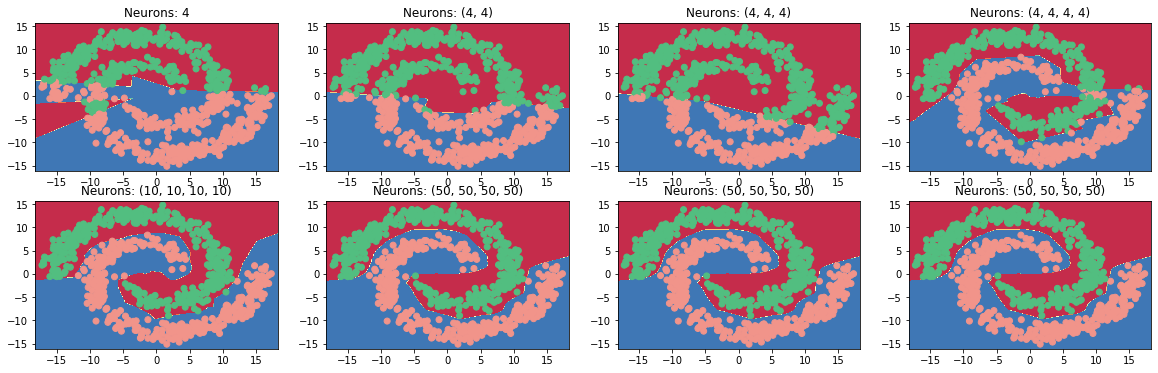

In [49]:
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [(4), (4,4), (4,4,4), (4,4,4,4), (10,10,10,10), (50,50,50,50), (50,50,50,50), (50,50,50,50)]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]].values, data["class"].values)
        plot_decision_boundary(lambda x: model.predict(x), data[["x","y"]].values, data["class"].values, axs[i,j])
        index +=1

# Logistic Regression with a Neural Network mindset

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

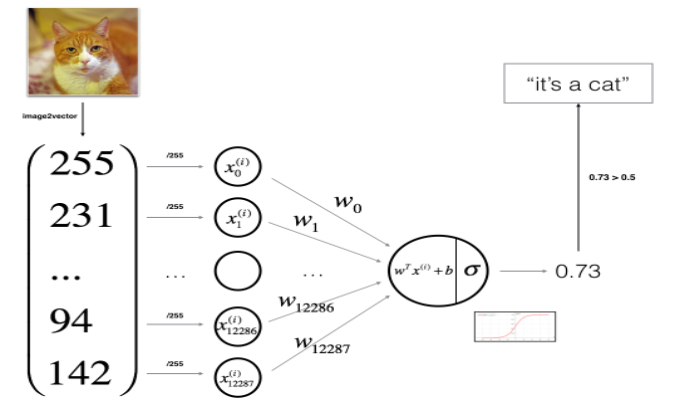

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

 ## Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

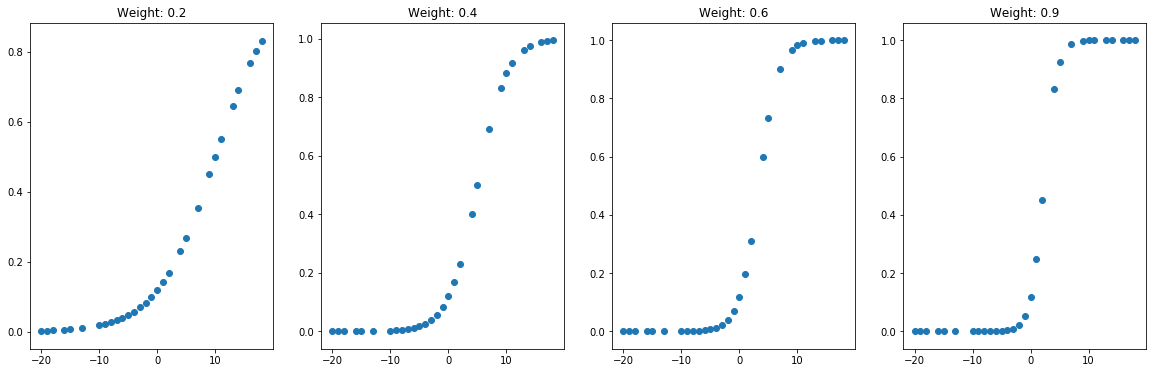

In [50]:
import random
import numpy as np
random.seed(10)
def sigmoid(x_values, weigth, b):
    """
    Provide the output of the logistic regression from x_values
    :param iterable x_values: values of the sample
    :param float weight: strength connection between input and neuron
    :param float b: threshold
    :return: output of the logistic regression
    """
    z = -np.array(x_values)*weigth+b
    sigma = 1/(1+np.exp(z))
    return sigma

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
weights = [0.2, 0.4, 0.6, 0.9]
x_values = random.sample(range(-20, 20), 30)
index = 0
for w in weights:    
    y_values = sigmoid(x_values, w, b=2)
    axs[index].scatter(x_values, y_values)
    axs[index].set_title("Weight: " + str(weights[index]))
    index+=1

We can see the slope increases when the weight values increases.

## Forward and Backward propagation for learning parameters

### Forward propagation:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \sigma(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

#### Loss and Cost function

Given {${(x^{(1)}, y^{(1)}),...,(x^{(m)}, y^{(m)})}$} you want that $\hat{y}^{(i)}\approx y^{(i)}$ where:

$\hat{y}^{(i)} = \sigma(w*x+b) = \frac{1}{1+e^{-(w*x+b)}}$

We define the loss function as:

$\ell(\hat y, y)=\frac{1}{2}(\hat y - y)^2$

However, the lecture notes mention that this is a non-convex function so it's bad for gradient descent (our optimisation algorithm):

https://ai.stackexchange.com/questions/14290/why-not-use-the-mse-instead-of-the-current-logistic-regression

Then, we use the following expression:

$\ell(\hat y, y)=-(ylog\hat y + (1-y)log(1-\hat y))$

it means that:

If $y=1 -> \ell(\hat y, y)=-log\hat y$ so we want $log\hat y$ large and therefore, $\hat y$ large.

If $y=0 -> \ell(\hat y, y)=-log(1-\hat y)$ so we want $log1-\hat y$ large and therefore, $\hat y$ small.

**The gradient descent tries to adjust the parameters to get the rules above**

Finally, we define the cost function with the sum of loss functions for each sample:

$J=-\frac{1}{m}\sum^m_{i=1}[(y^{(i)}log\hat y^{(i)} + (1-y^{(i)})log(1-\hat y^{(i)}))]$ 

Our objective is to find $w$ and $b$ that minimize $J(w,b)$

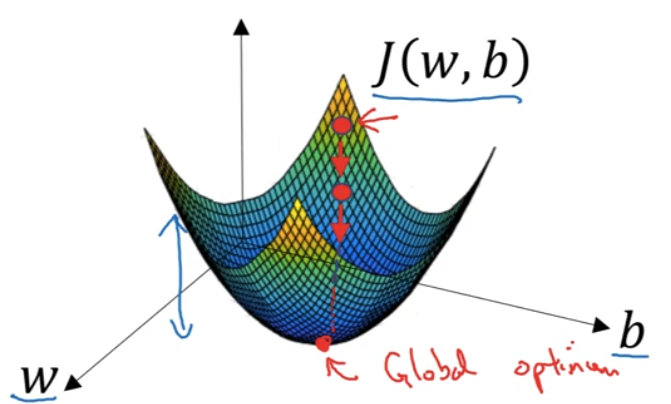

Lets simplify doin an example the loss function of logistic regression and $w$ as the parameter to optimize. The gradient descent consists on to update this parameter based on the cost function derivative. 

In the graph, we can see that if **we are in the left of the global minimum, the derivative will be negative and therefore, the weight updated will be higher**. 

On the other hand, if **we are in the right side, the derivative will be positive and therefore, the weigth updated will be lower**.

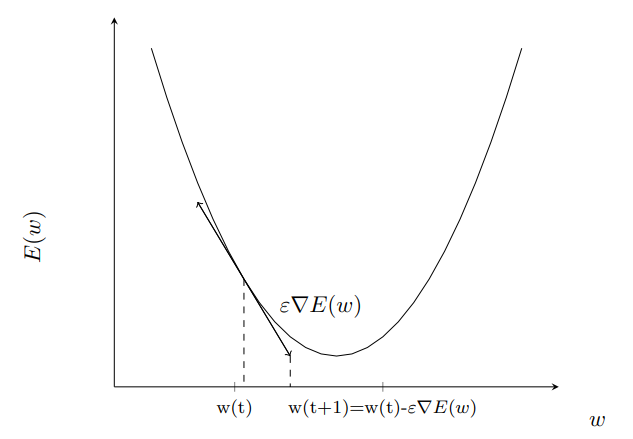

### Iris example:
We use $iris$ dataset and one of the variable to predict the flower classes. We only take take two classes.

In [51]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris["data"], columns = ['sepal length (cm)', 'sepal width (cm)', 
                                                  'petal length (cm)', 'petal width (cm)'])
iris_data["target"] = iris["target"]
iris_data = iris_data[iris_data["target"]<2]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


We create a function to represent the cost function above:

$J=-\frac{1}{m}\sum^m_{i=1}[(y^{(i)}log\hat y^{(i)} + (1-y^{(i)})log(1-\hat y^{(i)}))]$ 

In [52]:
def cost_function(x_values, target_values, weigth, b):
    """
    Logistic regression cost function
    :param iterable x_values: input data
    :param iterable target_values: target output
    :param float weight: parameter to optimize (strenght connection)
    :param float b: interceptron/threshold
    :return float cost_ff: cost function  
    """
    y_hat = sigmoid(x_values, weigth, b)
    cost_ff = -1/len(x_values)*np.sum((target_values*np.log(y_hat)+(1-target_values)*np.log(1-y_hat)))
    return cost_ff

We represent the cost function under different $w$ values to see where is the optimum and check the convexity of this function:

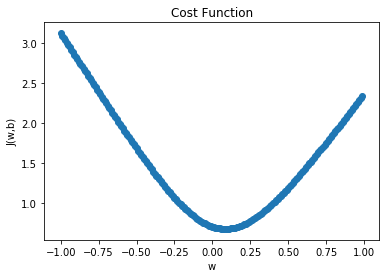

In [53]:
def overal_cost_function(iris_data):
    """
    Cost function under different w values
    :param pandas iris_data: input dataframe
    :returns: tuple (w_values, cost_values) 
    WHERE
    string w_values is weight parameter values 
    string cost_values is the cost function values
    """
    cost_values = []
    w_values = []
    for w in np.arange(-1, 1, 0.01):
        w_values.append(w)
        cost_values.append(cost_function(iris_data["sepal length (cm)"].values, 
                                         iris_data["target"].values, w, 0.3))
    return w_values, cost_values
w_values, cost_values = overal_cost_function(iris_data)
plt.scatter(w_values, cost_values);
plt.title("Cost Function");
plt.xlabel("w");
plt.ylabel("J(w,b)");

https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$

In [54]:
def cost_function_diff(x_values, target_values, weigth, b):
    """
    Derivative of the cost function
    :param iterable x_values: values of the sample
    :param float weight: 
    :param float b:
    :return: output of the derivative cost function
    """
    y_hat = sigmoid(x_values, weigth, b)
    cost_diff = 1/len(x_values)*np.sum((y_hat-target_values)*x_values)
    return cost_diff

0.14049230718123717

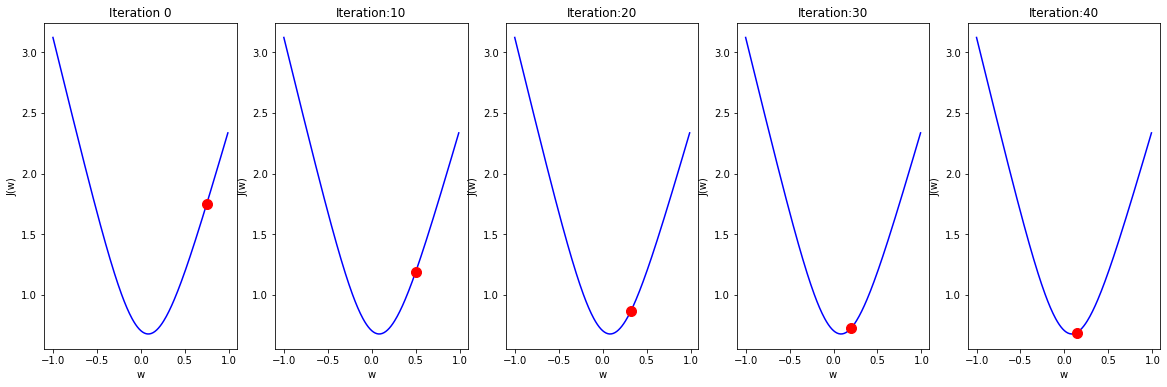

In [57]:
def optimize(x_values, target_values, b):
    """
    """
    w = 0.75                                                         # Initial weight
    iter_max = 100                                                   # Maximum number of iterations
    error_max = 0.1                                                  # Stop criteria
    learning_rate = 0.01                                             # Learning speed
    cost_ff = cost_function(x_values, target_values, w, b)
    w_values, cost_values = overal_cost_function(iris_data)
    fig, axs = plt.subplots(1, 5, figsize=(20, 6))
    axs[0].plot(w_values, cost_values, "b-");
    axs[0].set_title("Iteration 0");
    axs[0].plot(w, cost_ff, 'ro', markersize=10)
    axs[0].set_xlabel("w");
    axs[0].set_ylabel("J(w)");
    iter_graph=1
    iter = 0
    while (cost_ff>0.1) & (iter <= iter_max):
        cost_diff = np.sum(cost_function_diff(x_values, target_values, w, b))
        w= w-cost_diff*learning_rate
        cost_ff = cost_function(x_values, target_values, w, b)
        if (iter%10==0) & (iter>0):
            axs[iter_graph].plot(w_values, cost_values, "b-");
            axs[iter_graph].plot(w, cost_ff, 'ro', markersize=10)
            axs[iter_graph].set_title("Iteration:" + str(iter));
            axs[iter_graph].set_xlabel("w");
            axs[iter_graph].set_ylabel("J(w)");
            iter_graph += 1
        iter+=1
    return w
optimize(iris_data["sepal length (cm)"].values, iris_data["target"].values, 0.3)

Neural Networl from scratch using Python:
https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf

## References

https://www.coursera.org/learn/machine-learning